### Read in corpus of data and create list of intervals

In [6]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np

Bach = corpus.search('Bach', 'Composer')
intrvlist = []
cnt = 0
for thisPiece in Bach:
    print('{} of {} total pieces'.format(cnt, len(Bach)))
    thisScore = thisPiece.parse()
    for thisPart in thisScore.parts:
        testNotes = thisPart.flat.getElementsByClass('Note')
        for n1, n2 in zip(testNotes[:-1], testNotes[1:]):
            intrvlist.append(interval.Interval(n1,n2).semitones)

    cnt += 1

plt.hist(intrvBach, bins=np.arange(-19,21)-.5)
plt.show()

0 of 362 total pieces
1 of 362 total pieces
2 of 362 total pieces
3 of 362 total pieces
4 of 362 total pieces
5 of 362 total pieces
6 of 362 total pieces
7 of 362 total pieces
8 of 362 total pieces
9 of 362 total pieces
10 of 362 total pieces
11 of 362 total pieces
12 of 362 total pieces
13 of 362 total pieces
14 of 362 total pieces
15 of 362 total pieces
16 of 362 total pieces
17 of 362 total pieces
18 of 362 total pieces
19 of 362 total pieces
20 of 362 total pieces
21 of 362 total pieces
22 of 362 total pieces
23 of 362 total pieces
24 of 362 total pieces
25 of 362 total pieces
26 of 362 total pieces
27 of 362 total pieces
28 of 362 total pieces
29 of 362 total pieces
30 of 362 total pieces
31 of 362 total pieces
32 of 362 total pieces
33 of 362 total pieces
34 of 362 total pieces
35 of 362 total pieces
36 of 362 total pieces
37 of 362 total pieces
38 of 362 total pieces
39 of 362 total pieces
40 of 362 total pieces
41 of 362 total pieces
42 of 362 total pieces
43 of 362 total piece

347 of 362 total pieces
348 of 362 total pieces
349 of 362 total pieces
350 of 362 total pieces
351 of 362 total pieces
352 of 362 total pieces
353 of 362 total pieces
354 of 362 total pieces
355 of 362 total pieces
356 of 362 total pieces
357 of 362 total pieces
358 of 362 total pieces
359 of 362 total pieces
360 of 362 total pieces
361 of 362 total pieces


### define a recursive pattern search function to search for strings of intervals in the list

In [23]:
def patternsearch(seq, pat, indices=None):
    if indices is None:
        indices = np.arange(len(seq))
    found = (seq == pat[0]).nonzero()[0]
    inind = np.in1d(found, indices)
    if len(pat) == 1:
        return found[inind]
    elif np.any(inind):
        return patternsearch(seq, pat[1:], indices=found[inind]+1)
    else:
        return []

### Create melodies based on the interval counts

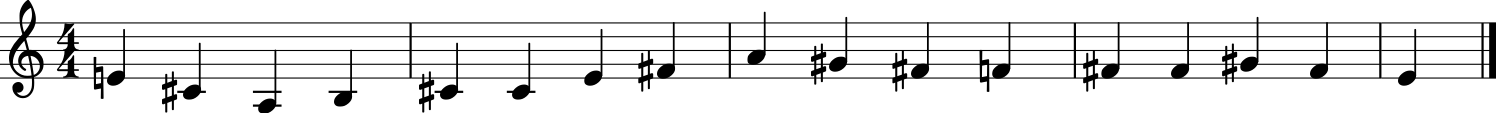

In [91]:
from scipy.stats import mode
intrvBach = np.array(intrvlist)

# create the number of interval
intrvNum = 16
intrvPtrn = []
# # use this function to get the MOST common melody
# func = lambda x: mode(x)[0][0]
# use this function to get a random melody in Bach Style
func = np.random.choice
# get an inteval pattern
intrvDist = np.array(intrvlist)
for iN in range(notenum):
    nextIntrv = func(intrvDist)
    intrvPtrn.append(func(notedist))    
    eop = patternsearch(intrvBach, intrvPtrn)
    intrvDist = intrvBach[eop+1]

# turn the interval list into melodies
melNotes = [note.Note(np.random.randint(57,69))]
for semi in noteptrn:
    melNotes.append(melNotes[-1].transpose(semi))

melody = stream.Stream()
melody.append(melNotes)
melody.show()